Average Netflix price (INR): ₹573.62
Total records before outlier removal: 8807
Total records after outlier removal: 8807
Cleaned data saved as netflix_cleaned_prices.csv


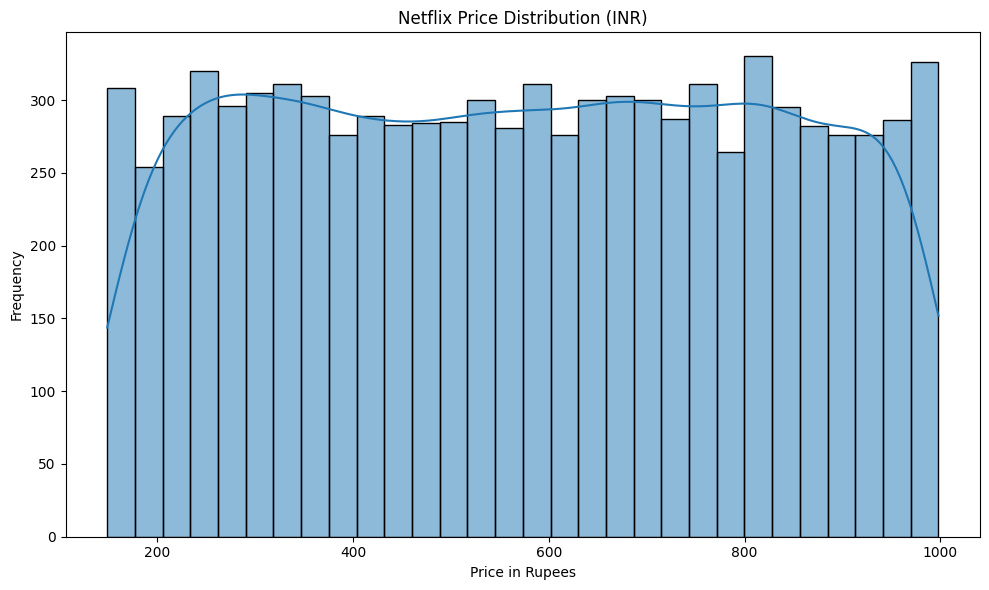

In [11]:
# ---------------------------------------
# Import required libraries
# ---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# Load Netflix dataset
# ---------------------------------------
# Make sure netflix_titles.csv is in the same folder
df = pd.read_csv("netflix_titles.csv")

# ---------------------------------------
# Create synthetic price column (INR)
# ---------------------------------------
# Netflix dataset does not contain prices,
# so prices are generated for analysis purposes
np.random.seed(42)
df["price_rupees"] = np.random.randint(149, 999, size=len(df))

# ---------------------------------------
# Remove rows with missing prices (safety)
# ---------------------------------------
df = df.dropna(subset=["price_rupees"])

# ---------------------------------------
# Calculate average price
# ---------------------------------------
average_price = df["price_rupees"].mean()
print(f"Average Netflix price (INR): ₹{average_price:.2f}")

# ---------------------------------------
# Remove outliers using IQR method
# ---------------------------------------
Q1 = df["price_rupees"].quantile(0.25)
Q3 = df["price_rupees"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_df = df[
    (df["price_rupees"] >= lower_bound) &
    (df["price_rupees"] <= upper_bound)
]

print("Total records before outlier removal:", len(df))
print("Total records after outlier removal:", len(cleaned_df))

# ---------------------------------------
# Save cleaned data to new CSV file
# ---------------------------------------
cleaned_df.to_csv("netflix_cleaned_prices.csv", index=False)
print("Cleaned data saved as netflix_cleaned_prices.csv")

# ---------------------------------------
# Visualize price distribution
# ---------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df["price_rupees"], bins=30, kde=True)

plt.title("Netflix Price Distribution (INR)")
plt.xlabel("Price in Rupees")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
